In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('src')

import numpy as np
from pyscipopt import Model
from solvers.sat.dpll import DPLL
from solvers.sat.scip import SCIP
import scipy
from hard.wagner import Wagner
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/home/fernando/.local/share/virtualenvs/hard_instances-tQ8GgIsG/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
w = Wagner(10, lr=3e-4, device="cuda")

In [3]:
w.generate(10)

tensor([[1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 1., 1., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 1., 1., 1., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 1., 1., 1., 1., 1., 0.]], device='cuda:0')

In [4]:
def score(x):
    return x.sum()

In [5]:
w.train(score, generations=50)

Generations: 100%|██████████| 50/50 [00:06<00:00,  7.45it/s, max_score=10, moving_avg_score=8.64, pop_size=14948]


In [6]:
w.generate(10)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
        [1., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.]], device='cuda:0')

In [3]:
w = Wagner(30, lr=3e-4, frac_survival=0.80, device="cuda")
dpll = DPLL()
scip = SCIP()

def score_dpll(x):
    return dpll.solve_instance(x.cpu().numpy().reshape(10, 3))["wallclock_time"]

def score_scip(x):
    return scip.solve_instance(x.cpu().numpy().reshape(10, 3), pure_sat=True)["runtime"]

In [4]:
w.train(score_scip, generations=100, individuals_per_generation=500)

Generations:   0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'pyscipopt.scip.Model' object has no attribute 'addConsLogicor'

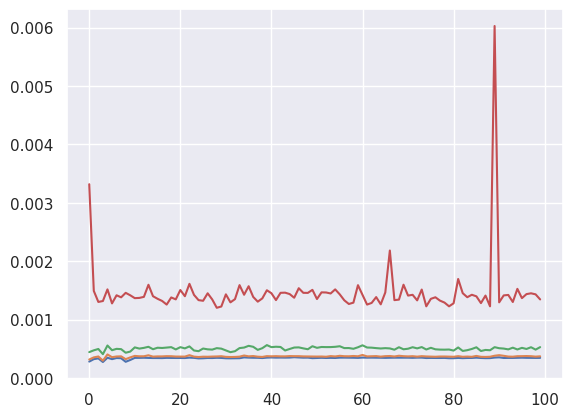

In [54]:
plt.plot([np.quantile(s, 0.25) for s in w.scores_per_generation])
plt.plot([np.quantile(s, 0.50) for s in w.scores_per_generation])
plt.plot([np.quantile(s, 0.75) for s in w.scores_per_generation])
plt.plot([np.quantile(s, 1.00) for s in w.scores_per_generation])
# plt.ylim(0.00036, 0.0004)